## Predicting diabetes
In the previous project we saw how we could use a decision tree to predict data sets related to classification and regression. However, did you know that we can improve the prediction of a tree by using a random forest?

As we have studied, a random forest is a grouping of trees generated with random portions of the data and with random criteria. This view would allow us to improve the effectiveness of the model when an individual tree is not sufficient.

In this project you will focus on this idea by training the dataset to improve the accuracy.

Remember that the previous project can be found here: https://github.com/DalynLC/predictingDiabetes

### Model Random Forest

In [12]:
import pandas as pd
test_data = pd.read_csv("/workspaces/RandomForest/data/processed/diabetes_test.csv")
train_data = pd.read_csv("/workspaces/RandomForest/data/processed/diabetes_train.csv")
train_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.058824,0.419355,0.142857,0.012195,0.123188,0.100204,0.140478,0.083333,0.0
1,0.000000,0.361290,0.469388,0.109756,0.038647,0.257669,0.221605,0.000000,0.0
2,0.000000,0.877419,0.428571,0.268293,0.074879,0.486708,0.774979,0.066667,1.0
3,0.235294,0.548387,0.632653,0.036585,0.304348,0.345603,0.065329,0.033333,0.0
4,0.117647,0.258065,0.265306,0.073171,0.070048,0.249489,0.380017,0.000000,0.0


In [13]:
X_train = train_data.drop(["Outcome"], axis = 1)
y_train = train_data["Outcome"]
X_test = test_data.drop(["Outcome"], axis = 1)
y_test = test_data["Outcome"]

In [14]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

[Text(0.3179253472222222, 0.96875, 'BMI <= 0.22\ngini = 0.456\nsamples = 375\nvalue = [390, 211]\nclass = 0'),
 Text(0.06944444444444445, 0.90625, 'Insulin <= 0.567\ngini = 0.206\nsamples = 122\nvalue = [182, 24]\nclass = 0'),
 Text(0.19368489583333331, 0.9375, 'True  '),
 Text(0.06018518518518518, 0.84375, 'Age <= 0.242\ngini = 0.199\nsamples = 121\nvalue = [182, 23]\nclass = 0'),
 Text(0.027777777777777776, 0.78125, 'BMI <= 0.149\ngini = 0.08\nsamples = 86\nvalue = [137, 6]\nclass = 0'),
 Text(0.018518518518518517, 0.71875, 'gini = 0.0\nsamples = 45\nvalue = [81, 0]\nclass = 0'),
 Text(0.037037037037037035, 0.71875, 'DiabetesPedigreeFunction <= 0.154\ngini = 0.175\nsamples = 41\nvalue = [56, 6]\nclass = 0'),
 Text(0.027777777777777776, 0.65625, 'DiabetesPedigreeFunction <= 0.138\ngini = 0.278\nsamples = 24\nvalue = [30, 6]\nclass = 0'),
 Text(0.018518518518518517, 0.59375, 'Age <= 0.108\ngini = 0.117\nsamples = 22\nvalue = [30, 2]\nclass = 0'),
 Text(0.009259259259259259, 0.53125, 'g

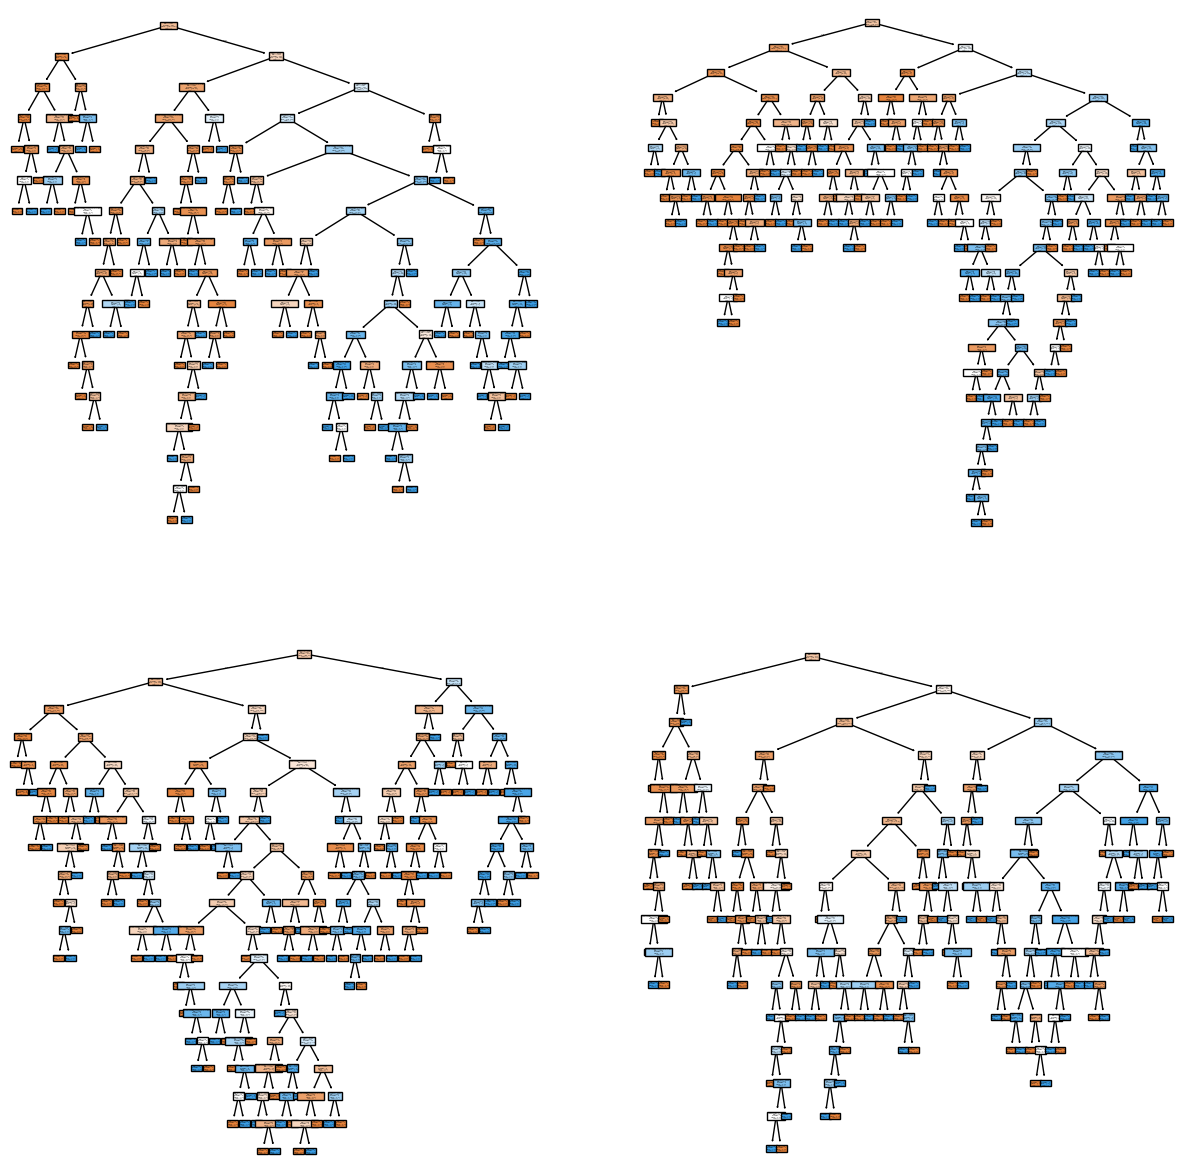

In [15]:
import matplotlib.pyplot as plt
from sklearn import tree

fig, axis = plt.subplots(2, 2, figsize = (15, 15))

# We show the first 4 trees out of the 100 generated (default)
tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)


In [16]:
y_pred = model.predict(X_test)
y_pred

array([1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1.,
       0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.])

In [17]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7615894039735099

El accuracy del modelo base del modelo Random Forest es menor que el obtenido en Decisión Tree, tanto en el modelo base como en el modelo optimizado. 
Se realizará la optimización de hiperparámetros para intentar aumentar el accuracy de este modelo.

### Optimización de hiperparámetros

In [18]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

random_grid = {"max_depth" : [4,8,10,30,50,100,120],
                'min_samples_split' : [10,30,50,100,150],
                'min_samples_leaf' : [10,30,50,100,150],
               'max_features': [None, 'sqrt','log2'],
               'n_estimators': [100,150,180,200]}

random_search = RandomizedSearchCV(RandomForestClassifier(),
                                   random_grid)
random_search.fit(X_train, y_train)
print("best: ",random_search.best_params_)

best:  {'n_estimators': 200, 'min_samples_split': 30, 'min_samples_leaf': 10, 'max_features': None, 'max_depth': 30}


In [19]:
model = RandomForestClassifier(random_state=42,max_depth=120, max_features=None, min_samples_leaf=10,
                       min_samples_split=10, n_estimators=150)

model.fit(X_train, y_train)

RandomForestClassifier(max_depth=120, max_features=None, min_samples_leaf=10,
                       min_samples_split=10, n_estimators=150, random_state=42)

In [20]:
y_pred = model.predict(X_test)
y_pred

array([1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1.,
       0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1.])

In [21]:
accuracy_score(y_test, y_pred)

0.8013245033112583

Se lanzó el random search un total de 8 veces, eligiendo los parámetros cuyo accuracy indicaban un valor más alto.

### Conclusiones

Con el modelo mejorado, el accuracy sube de 0.7615894039735099 a 0.8013245033112583, lo que indica que nuestro modelo mejoró notablemente, y de los 4 que se han realizado, el Random Forest optimizado es el modelo con mejor accuracy hasta el momento, venciendo al decisión tree optimizado, cuyo accuracy es de 0.7814569536423841